In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
idx = pd.IndexSlice

In [2]:
segp = r'C:\Users\b1090197\OneDrive\Documents\XSki\xski\files\segment_times.csv'
sp = r'C:\Users\b1090197\OneDrive\Documents\XSki\xski\files\split_times.csv'

seg_time = pd.read_csv(segp, header=[0,1], index_col=[0])
seg_time.columns.rename("Participant", level=0, inplace=True)
seg_time.columns.rename("Intensity", level=1, inplace=True)

splits = pd.read_csv(sp, header=[0,1], index_col=[0])
splits.columns.rename("Participant", level=0, inplace=True)
splits.columns.rename("Intensity", level=1, inplace=True)

In [4]:
splits = splits.T
splits.describe()

,seg1_flat,seg2_up,seg3_down,seg4_turn,seg5_up,seg6_down,seg7_flat
count,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000
mean,34.714815,53.409722,59.798843,83.368981,94.674769,106.119213,153.280324
std,26.205900,35.044777,35.831841,42.276822,48.352264,51.443713,53.583979
min,-25.787500,-14.037500,-7.787500,13.462500,21.712500,30.962500,92.720833
25%,29.772917,38.533333,44.033333,59.971875,67.753125,76.445833,109.339583
50%,32.710417,43.606250,49.158333,65.981250,72.139583,81.943750,126.808333
75%,57.691667,86.748958,94.377083,127.815625,148.065625,160.253125,204.859375
max,69.983333,112.987500,120.737500,154.487500,175.737500,194.237500,245.583333


In [5]:
seg_time=seg_time.T
seg_time.describe()

,seg1_flat,seg2_up,seg3_down,seg4_turn,seg5_up,seg6_down,seg7_flat
count,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000
mean,34.714815,18.694907,6.389120,23.570139,11.305787,11.444444,47.161111
std,26.205900,11.538845,1.105844,8.296183,6.823027,3.516302,22.420948
min,-25.787500,6.500000,4.750000,13.250000,4.000000,7.250000,22.887500
25%,29.772917,10.187500,5.500000,16.501042,5.500000,9.312500,31.222917
50%,32.710417,13.000000,6.000000,20.500000,8.000000,10.000000,39.858333
75%,57.691667,28.625000,7.250000,33.251042,18.500000,12.187500,53.502083
max,69.983333,43.004167,8.500000,34.500000,22.504167,18.750000,98.245833


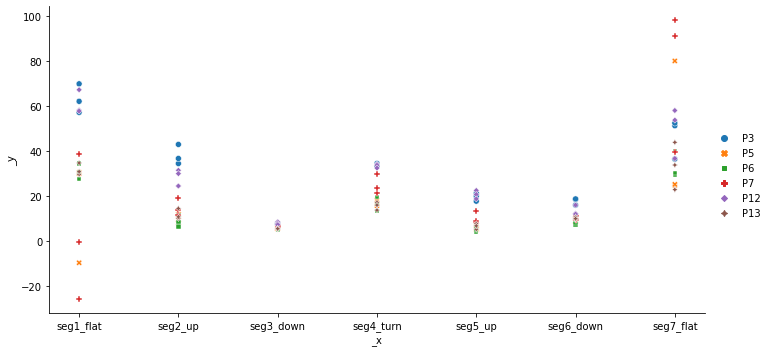

In [13]:
sns.relplot(data=seg_time.T, aspect=2)

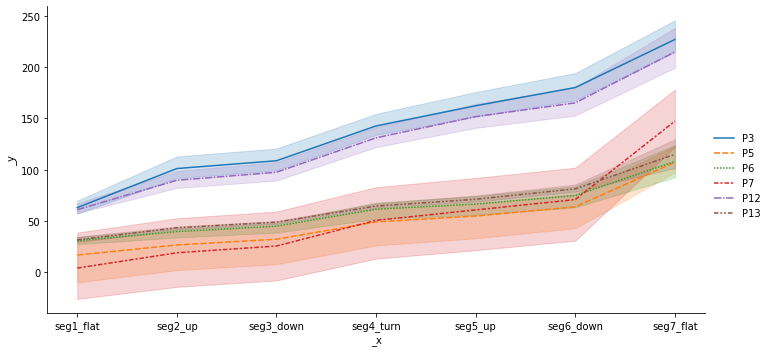

In [12]:
sns.relplot(data=splits.T, kind='line', aspect=2)